In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

try:
    import cupy as xp
except ImportError:
    import numpy as xp
import numpy as np

import numpy as np
import scipy.signal
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

from astropy import units as u
import blimpy as bl

import sys
sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def get_numpy(v):
    try:
        return xp.asnumpy(v)
    except AttributeError:
        return v
    
def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


In [2]:
%matplotlib inline

In [3]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

In [5]:
fn = '/datax/scratch/bbrzycki/data/raw_files/test_snr_actual_5min.rawspec.0000.fil'

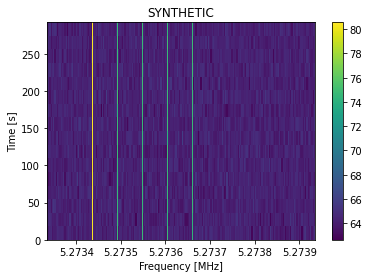

In [63]:
fftlength = 1048576
f = chan_bw / fftlength * int(fftlength*(2+0.3-0.5)) / 1e6
wf = bl.Waterfall(fn,
                  f_start=f-0.0001,
                  f_stop=f+0.0005)
wf.plot_waterfall()

In [64]:
frame = stg.Frame(wf)

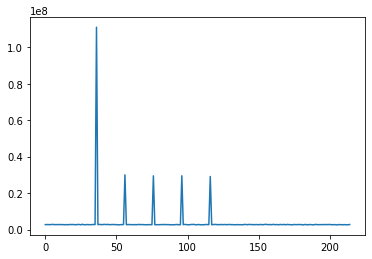

In [65]:
def integrate_t(frame):
    spectrum = np.mean(frame.data, axis=0)
    return spectrum

spec = integrate_t(frame)
plt.plot(spec)

In [51]:
m,s = frame.get_noise_stats()
m,s

(2709679.5, 260752.6)

In [108]:
13.6**2 * 2 * 2 * 1.11 * 1048576 * 51 / 127**2

2722848.227690644

In [109]:
2722848.227690644 * (2/(2*2*51))**0.5

269602.14825462835

In [123]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024


chan_bw = sample_rate/num_branches

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)




num_pols = 2


# Params for high res data product
fftlength = 1048576
int_factor = 51
obs_length = 300


antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=0,
                              ascending=True,
                              num_pols=num_pols)


rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=16)

dt = rvb.tbin * fftlength * int_factor
tchans = rvb.time_per_block * rvb.get_num_blocks(obs_length)  / dt

dt, tchans

(18.253611008, 16.431372549019606)

In [120]:
int(300 * abs(rvb.chan_bw) * rvb.num_antennas * rvb.num_chans * rvb.bytes_per_sample / rvb.block_size)

1676

In [124]:
rvb.get_num_blocks(obs_length)

1676

In [127]:
(16 / (rvb.time_per_block / dt))**0.5

40.39801975344831

In [129]:
rvb.time_per_block/ rvb.tbin / 1024

512.0

In [53]:
np.std(spec[130:]), s/4

(68181.51, 65188.1484375)

In [58]:
np.mean(spec[130:])

2711193.0

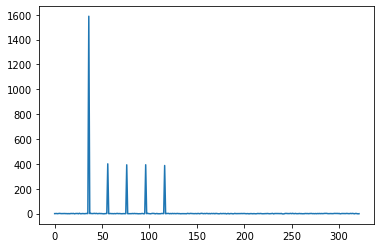

In [60]:
plt.plot((spec - np.mean(spec[130:]))/np.std(spec[130:]))

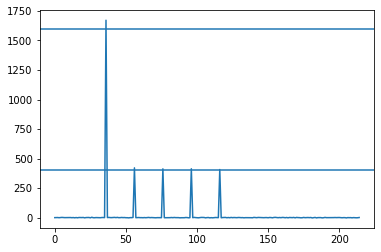

In [68]:
def snr_integrate_t(frame):
    m, s = frame.get_noise_stats()
    spectrum = np.mean(frame.data, axis=0)
    return (spectrum - m) / (s / frame.shape[0]**0.5)

spec = snr_integrate_t(frame)
plt.plot(spec)
plt.axhline(400)
plt.axhline(400*4)

In [37]:
frame.shape

(16, 179)

In [38]:
1048576 * 51 / 127**2

3315.6039432078865

In [42]:
np.sort(normalized_integrate_t(frame))[::-1]

array([ 4.18353333e+02,  1.05483559e+02,  1.03536163e+02,  1.03383041e+02,
        1.01941872e+02,  7.32158005e-01,  5.49671173e-01,  4.73349214e-01,
        4.67690378e-01,  4.63295370e-01,  4.34747428e-01,  4.32448238e-01,
        4.08781171e-01,  4.06661034e-01,  4.03524578e-01,  3.99836749e-01,
        3.91150326e-01,  3.73610198e-01,  3.70662808e-01,  3.62104148e-01,
        3.59793842e-01,  3.58032674e-01,  3.28342259e-01,  3.20619404e-01,
        3.14375371e-01,  3.00813138e-01,  2.96440303e-01,  2.96243668e-01,
        2.74132401e-01,  2.69730508e-01,  2.66237497e-01,  2.63708591e-01,
        2.59645790e-01,  2.54764497e-01,  2.50130832e-01,  2.45515689e-01,
        2.38932207e-01,  2.36544952e-01,  2.25791946e-01,  2.25335479e-01,
        2.12912977e-01,  2.09303319e-01,  2.03478172e-01,  2.01726228e-01,
        1.97327882e-01,  1.95299909e-01,  1.91564485e-01,  1.87626451e-01,
        1.85866475e-01,  1.85434490e-01,  1.83293223e-01,  1.83073133e-01,
        1.79870769e-01,  

In [73]:
fn0 = '/datax/scratch/bbrzycki/data/raw_files/test_lower_sampling_0.rawspec.0000.fil'
fn1 = '/datax/scratch/bbrzycki/data/raw_files/test_lower_sampling_1.rawspec.0000.fil'

In [74]:
f0 = chan_bw / 1024 * int(2.2*1024) / 1e6
print(f0)

6.443023681640625


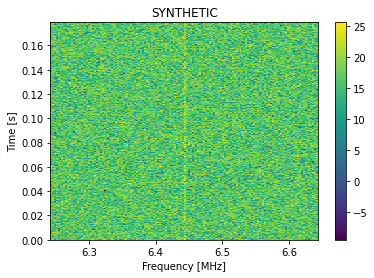

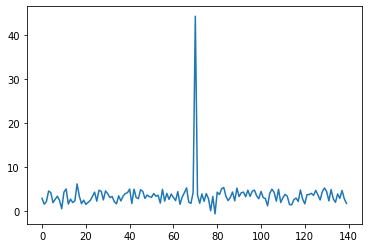

In [91]:
wf = bl.Waterfall(fn0, f_start=f0-0.2, f_stop=f0+0.2)
frame = stg.Frame(wf)
frame.bl_render()
plt.show()
spec = snr_integrate_t(frame)
plt.plot(spec)

37.392654

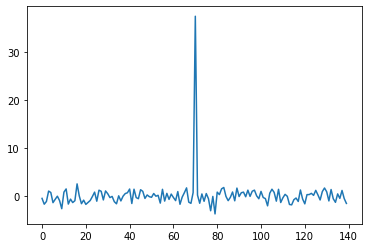

In [93]:
spec = integrate_t(frame)
x = (spec-spec[80:].mean())/spec[80:].std()

plt.plot(x)
np.max(x)

In [86]:
frame.get_noise_stats()

(47.767597, 29.608953)

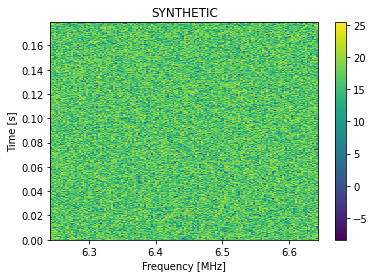

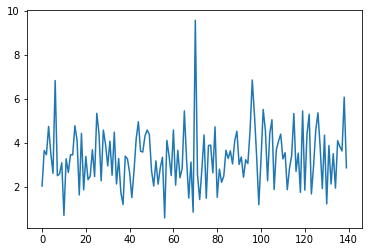

In [94]:
wf = bl.Waterfall(fn1, f_start=f0-0.2, f_stop=f0+0.2)
frame = stg.Frame(wf)
frame.bl_render()
plt.show()
spec = snr_integrate_t(frame)
plt.plot(spec)

4.8375673

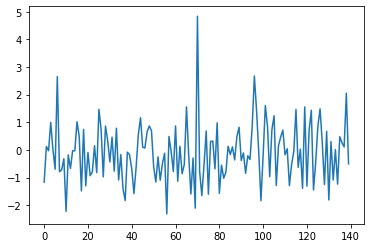

In [95]:
spec = integrate_t(frame)
x = (spec-spec[80:].mean())/spec[80:].std()

plt.plot(x)
np.max(x)

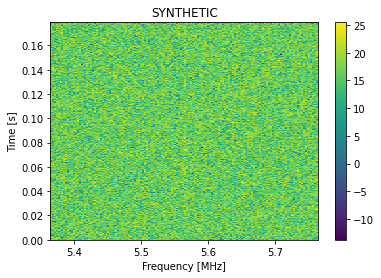

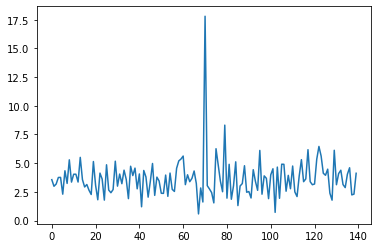

17.805521


10.848968

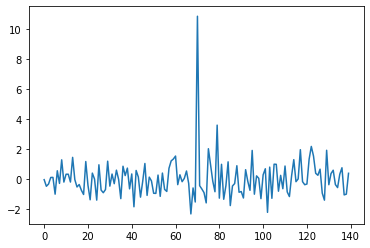

In [138]:
f0 = chan_bw / 1024 * int((2.4-0.5)*1024) / 1e6
wf = bl.Waterfall(fn0, f_start=f0-0.2, f_stop=f0+0.2)
frame = stg.Frame(wf)
frame.bl_render()
plt.show()
spec = snr_integrate_t(frame)
plt.plot(spec)
plt.show()
print(np.max(spec))

spec = integrate_t(frame)
x = (spec-spec[80:].mean())/spec[80:].std()

plt.plot(x)
np.max(x)

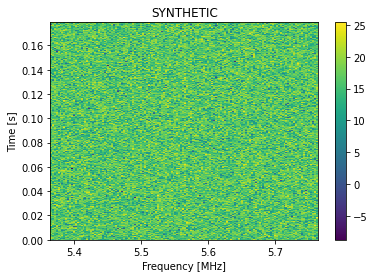

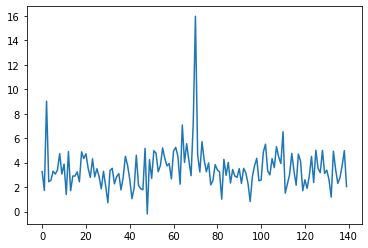

15.968284


10.856003

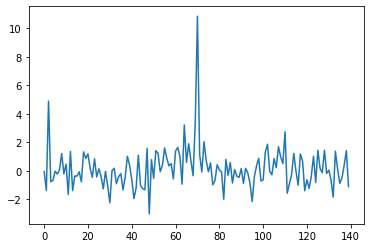

In [139]:
wf = bl.Waterfall(fn1, f_start=f0-0.2, f_stop=f0+0.2)
frame = stg.Frame(wf)
frame.bl_render()
plt.show()
spec = snr_integrate_t(frame)
plt.plot(spec)
plt.show()
print(np.max(spec))

spec = integrate_t(frame)
x = (spec-spec[80:].mean())/spec[80:].std()

plt.plot(x)
np.max(x)

In [143]:
3e9/2**9

5859375.0

In [144]:
2**9

512

In [145]:
3e9/1024

2929687.5

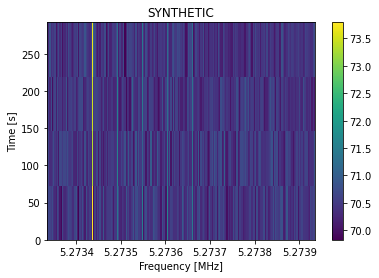

In [146]:
fn = '/datax/scratch/bbrzycki/data/raw_files/test_snr_lightweight.rawspec.0000.fil'
fftlength = 1048576
f = chan_bw / fftlength * int(fftlength*(2+0.3-0.5)) / 1e6
wf = bl.Waterfall(fn,
                  f_start=f-0.0001,
                  f_stop=f+0.0005)
wf.plot_waterfall()

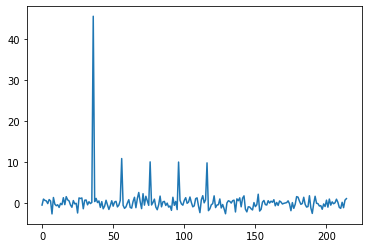

In [148]:
frame = stg.Frame(wf)

def snr_integrate_t(frame):
    m, s = frame.get_noise_stats()
    spectrum = np.mean(frame.data, axis=0)
    return (spectrum - m) / (s / frame.shape[0]**0.5)

spec = snr_integrate_t(frame)
plt.plot(spec)

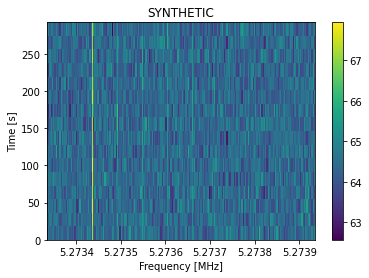

In [149]:
fn = '/datax/scratch/bbrzycki/data/raw_files/test_snr_lightweight_blocks.rawspec.0000.fil'
fftlength = 1048576
f = chan_bw / fftlength * int(fftlength*(2+0.3-0.5)) / 1e6
wf = bl.Waterfall(fn,
                  f_start=f-0.0001,
                  f_stop=f+0.0005)
wf.plot_waterfall()

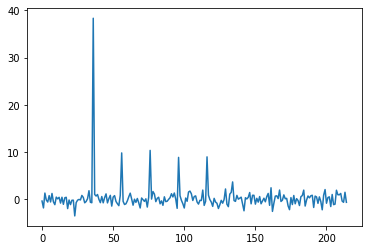

In [150]:
frame = stg.Frame(wf)

def snr_integrate_t(frame):
    m, s = frame.get_noise_stats()
    spectrum = np.mean(frame.data, axis=0)
    return (spectrum - m) / (s / frame.shape[0]**0.5)

spec = snr_integrate_t(frame)
plt.plot(spec)

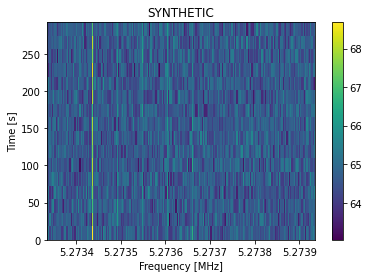

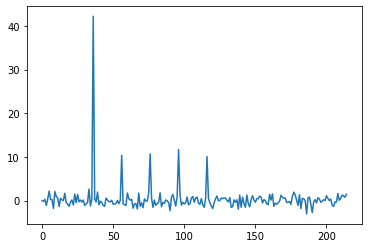

In [157]:
fn = '/datax/scratch/bbrzycki/data/raw_files/test_snr_lightweight.rawspec.0000.fil'
fftlength = 1048576
f = chan_bw / fftlength * int(fftlength*(2+0.3-0.5)) / 1e6
wf = bl.Waterfall(fn,
                  f_start=f-0.0001,
                  f_stop=f+0.0005)
wf.plot_waterfall()
plt.show()

frame = stg.Frame(wf)

def snr_integrate_t(frame):
    m, s = frame.get_noise_stats()
    spectrum = np.mean(frame.data, axis=0)
    return (spectrum - m) / (s / frame.shape[0]**0.5)

spec = snr_integrate_t(frame)
plt.plot(spec)

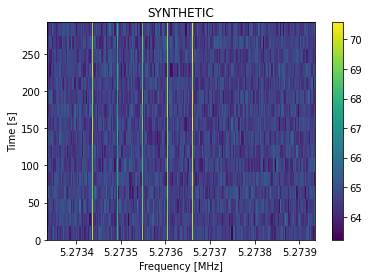

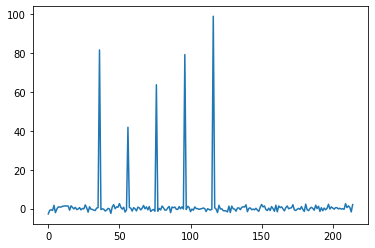

In [163]:
fn = '/datax/scratch/bbrzycki/data/raw_files/test_snr_lightweight.rawspec.0000.fil'
fftlength = 1048576
f = chan_bw / fftlength * int(fftlength*(2+0.3-0.5)) / 1e6
wf = bl.Waterfall(fn,
                  f_start=f-0.0001,
                  f_stop=f+0.0005)
wf.plot_waterfall()
plt.show()

frame = stg.Frame(wf)

def snr_integrate_t(frame):
    m, s = frame.get_noise_stats()
    spectrum = np.mean(frame.data, axis=0)
    return (spectrum - m) / (s / frame.shape[0]**0.5)

spec = snr_integrate_t(frame)
plt.plot(spec)